# 1次元スチューデントのt分布

- aouthor：[@anemptyarchive](https://www.anarchive-beta.com/)
- date：
    - 2022.07.25：執筆開始


In [1]:
# 更新時間を出力
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2022-07-28 15:12:08


# 1次元スチューデントのt分布の計算

　1次元スチューデントのt分布(Student's t-Distribution)の確率密度と統計量を計算します。t分布については「定義式の確認」を参照してください。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用ライブラリ
import numpy as np
from scipy.stats import t
from scipy.special import loggamma, gamma

<br>

## 確率密度の計算

　スチューデントのt分布に従う確率密度を計算する方法をいくつか確認します。  
<br>

### 標準化t分布

　まずは、標準化されたt分布の計算を行います。  
<br>

#### パラメータの設定

　t分布の自由度$\nu$と確率変数の実現値$x$を設定します。

In [3]:
# 自由度を指定
nu = 5

# 確率変数を指定
x = 1.5

　正の整数$\nu$、実数$x$を指定します。設定した値に従う確率密度を計算します。  
<br>

#### スクラッチで計算

　定義式から計算します。

In [4]:
# 定義式により確率密度を計算
C = gamma(0.5 * (nu + 1)) / gamma(0.5 * nu) / np.sqrt(np.pi * nu)
term = np.sqrt(1.0 + x**2 / nu)**(nu + 1)
dens = C / term
print(dens)

0.1245173446463551


　t分布は、次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{St}}
   &= \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \sqrt{\pi \nu}
          \Gamma(\frac{\nu}{2})
      }
\\
\mathrm{St}(x | \nu)
   &= C_{\mathrm{St}}
      \Bigl(
          1 + \frac{x^2}{\nu}
      \Bigr)^{-\frac{(\nu+1)}{2}}
\end{aligned}
$$

　ここで、$C_{\mathrm{St}}$はt分布の正規化係数、$\pi$は円周率、$\Gamma(x)$はガンマ関数です。  
　円周率は`NumPy`ライブラリの`pi`、ガンマ関数は`SciPy`ライブラリの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C = loggamma(0.5 * (nu + 1)) - loggamma(0.5 * nu) - 0.5 * np.log(np.pi * nu)
log_term = 0.5 * (nu + 1) * np.log(1.0 + x**2 / nu)
dens = np.exp(log_C - log_term)
print(dens)

0.12451734464635517


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{St}}
   &= \log \Gamma \Bigl(\frac{\nu + 1}{2}\Bigr)
      - \log \Gamma \Bigl(\frac{\nu}{2}\Bigr)
      - \frac{\log (\pi \nu)}{2}
\\
\log \mathrm{St}(x | \nu)
   &= \log C_{\mathrm{St}}
      - \frac{(\nu + 1)}{2}
        \log \left(
          1 + \frac{x^2}{\nu}
      \right)
\end{aligned}
$$

　対数をとったガンマ関数は、`loggamma()`で計算できます。引数の値が大きいと`gamma()`の計算結果が発散してしまいます。その場合でも、`loggamma()`で計算できます。  
　計算結果の指数をとると確率密度が得られます。

$$
\mathrm{St}(x | \nu)
    = \exp \Bigl(
          \log \mathrm{St}(x | \nu)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのクラスを使って確率密度を計算します。  
<br>

#### t分布のクラスによる計算

　t分布のクラス`t`の確率密度メソッド`pdf()`で計算します。

In [6]:
# t分布のメソッドにより確率密度を計算
dens = t.pdf(x=x, df=nu)
print(dens)

0.12451734464635512


　確率変数の引数`x`に`x`、自由度の引数`df`に`nu`を指定します。  

　`logpdf()`だと対数をとった確率密度を返します。

In [7]:
# t分布の対数をとったメソッドにより確率密度を計算
log_dens = t.logpdf(x=x, df=nu)
dens = np.exp(log_dens)
print(dens)

0.12451734464635517


　計算結果の指数をとると確率密度が得られます。  

　他のパラメータのデフォルト値は$\mu = 0, \sigma = 1$です。

In [8]:
# 確率密度を計算
dens = t.pdf(x=x, df=nu, loc=0.0, scale=1.0)
print(dens)

0.12451734464635512


　詳しくは次で確認します。  
<br>

### 一般化t分布：スケールパラメータを使用

　次は、スケールパラメータを用いた一般化されたt分布の計算を行います。  
<br>

#### パラメータの設定

　t分布のパラメータ$\nu, \mu, \sigma$と確率変数の実現値$x$を設定します。

In [9]:
# 形状パラメータ(自由度)を指定
nu = 5

# 位置パラメータを指定
mu = 2.0

# スケールパラメータを指定
sigma = 0.5

# 確率変数を指定
x = 1.5

　形状パラメータ(自由度)(正の整数)$\nu$、位置パラメータ(実数)$\mu$、スケールパラメータ(正の実数)$\sigma$、実数$x$を指定します。  
<br>

#### スクラッチで計算

　定義式から計算します。

In [10]:
# sigmaを使った定義式により確率密度を計算
C = gamma(0.5 * (nu + 1)) / gamma(0.5 * nu)
C /= np.sqrt(np.pi * nu) * sigma
term = np.sqrt(1.0 + ((x - mu) / sigma)**2 / nu)**(nu + 1)
dens = C / term
print(dens)

0.43935959470196134


　$\sigma$を用いたt分布は、次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{St}}
   &= \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \frac{1}{\sqrt{\pi \nu} \sigma}
\\
\mathrm{St}(x | \nu, \mu, \sigma)
   &= C_{\mathrm{St}}
      \left\{
          1
          + \frac{1}{\nu} \bigl(
              \frac{x - \mu}{\sigma}
          \Bigr)^2
      \right\}^{-\frac{(\nu+1)}{2}}
\end{aligned}
$$

　対数をとった定義式から計算します。

In [11]:
# 対数をとった定義式により確率密度を計算
log_C = loggamma(0.5 * (nu + 1)) - loggamma(0.5 * nu)
log_C -= np.log(sigma) + 0.5 * np.log(np.pi * nu)
log_term = 0.5 * (nu + 1) * np.log(1.0 + ((x - mu) / sigma)**2 / nu)
dens = np.exp(log_C - log_term)
print(dens)

0.4393595947019612


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{St}}
   &= \log \Gamma \Bigl(\frac{\nu + 1}{2}\Bigr)
      - \log \Gamma \Bigl(\frac{\nu}{2}\Bigr)
      - \log \sigma
      - \frac{\log (\pi \nu)}{2}
\\
\log \mathrm{St}(x | \nu, \mu, \sigma)
   &= \log C_{\mathrm{St}}
      - \frac{(\nu + 1)}{2}
        \log \left\{
          1
          + \frac{1}{\nu} \Bigl(
              \frac{x - \mu}{\sigma}
          \Bigr)^2
      \right\}
\end{aligned}
$$

　計算結果の指数をとると確率密度が得られます。  
<br>

#### t分布のクラスによる計算

　t分布のクラス`t`の確率密度メソッド`pdf()`で計算します。

In [12]:
# スチューデントのt分布の関数により確率密度を計算
dens = t.pdf(x=x, df=nu, loc=mu, scale=sigma)
print(dens)

0.4393595947019612


　確率変数の引数`x`に`x`、自由度の引数`df`に`nu`、位置パラメータの引数`loc`に`mu`、スケールパラメータの引数`scale`に`sigma`を指定します。  

　`logpdf()`だと対数をとった確率密度を計算します。

In [13]:
# スチューデントのt分布の対数をとった関数により確率密度を計算
log_dens = t.logpdf(x=x, df=nu, loc=mu, scale=sigma)
dens = np.exp(log_dens)
print(dens)

0.43935959470196123


　計算結果の指数をとると確率密度が得られます。  

　$\mu, \sigma$の引数を使わずに計算することもできます。

In [14]:
# 確率密度を計算
y = (x - mu) / sigma # 値を変換
dens = t.pdf(x=y, df=nu) / sigma
print(dens)

0.4393595947019612


　次の式で計算できます。

$$
\begin{aligned}
y  &= \frac{x - \mu}{\sigma}
\\
\mathrm{St}(x | \nu, \mu, \sigma)
   &= \frac{1}{\sigma}
      \mathrm{St}(y | \nu)
\end{aligned}
$$

　$x$を$\mu, \sigma$で標準化して$y$とします。自由度$\nu$のときの$y$の確率密度(分布)$\mathrm{St}(y | \nu)$を$\sigma$で割ると、$\nu, \mu, \sigma$のときの$x$の確率密度(分布)$\mathrm{St}(x | \nu, \mu, \sigma)$が得られます。  
<br>

### 一般化t分布：逆スケールパラメータを使用

　続いて、逆スケールパラメータを用いた一般化されたt分布の計算を行います。  
<br>

#### パラメータの設定

　t分布のパラメータ$\nu, \mu, \lambda$と確率変数の実現値$x$を設定します。

In [15]:
# 形状パラメータ(自由度)を指定
nu = 5

# 位置パラメータを指定
mu = 2.0

# 逆スケールパラメータを指定
lmd = 4.0

# 確率変数を指定
x = 1.5

　スケールパラメータ$\sigma$の代わりに、逆スケールパラメータ(正の実数)$\lambda$を指定します。  

　あるいは、$\sigma$を指定して$\lambda$を計算します。

In [16]:
# 逆スケールパラメータを計算
lmd = 1.0 / sigma**2
print(lmd)

4.0


　スケールパラメータ$\sigma$と逆スケールパラメータ$\lambda$は、$\lambda = \frac{1}{\sigma^2}$、$\sigma = \frac{1}{\sqrt{\lambda}}$の関係です。  
<br>

#### スクラッチで計算

　定義式から計算します。

In [17]:
# 定義式により確率密度を計算
C = gamma(0.5 * (nu + 1)) / gamma(0.5 * nu)
C *= np.sqrt(lmd / np.pi / nu)
term = np.sqrt(1.0 + lmd / nu * (x - mu)**2)**(nu + 1)
dens = C / term
print(dens)

0.43935959470196134


　$\lambda$を用いたt分布は、次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{St}}
   &= \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \Bigl(
          \frac{\lambda}{\pi \nu}
      \Bigr)^{\frac{1}{2}}
\\
\mathrm{St}(x | \nu, \mu, \lambda)
   &= C_{\mathrm{St}}
      \left\{
          1 + \frac{\lambda (x - \mu)^2}{\nu}
      \right\}^{-\frac{(\nu+1)}{2}}
\end{aligned}
$$

　対数をとった定義式から計算します。

In [18]:
# 対数をとった定義式により確率密度を計算
log_C = loggamma(0.5 * (nu + 1)) - loggamma(0.5 * nu)
log_C += 0.5 * (np.log(lmd) - np.log(np.pi * nu))
log_term = 0.5 * (nu + 1) * np.log(1.0 + lmd / nu * (x - mu)**2)
dens = np.exp(log_C - log_term)
print(dens)

0.4393595947019612


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{St}}
   &= \log \Gamma \Bigl(\frac{\nu + 1}{2}\Bigr)
      - \log \Gamma \Bigl(\frac{\nu}{2}\Bigr)
      + \frac{1}{2} \Bigl\{
          \log \lambda
          - \log (\pi \nu)
      \Bigr\}
\\
\log \mathrm{St}(x | \nu, \mu, \lambda)
   &= \log C_{\mathrm{St}}
      - \frac{(\nu + 1)}{2}
        \log \left\{
          1 + \frac{\lambda (x - \mu)^2}{\nu}
      \right\}
\end{aligned}
$$

　計算結果の指数をとると確率密度が得られます。  
<br>

#### t分布のクラスによる計算

　`pdf()`または`logpdf()`で計算します。

In [19]:
# スチューデントのt分布の関数により確率密度を計算
dens = t.pdf(x=x, df=nu, loc=mu, scale=1.0/np.sqrt(lmd))
print(dens)

# スチューデントのt分布の対数をとった関数により確率密度を計算
log_dens = t.logpdf(x=x, df=nu, loc=mu, scale=1.0/np.sqrt(lmd))
dens = np.exp(log_dens)
print(dens)

0.4393595947019612
0.43935959470196123


　スケールパラメータの引数`scale`に`lmd`の平方根の逆数を指定します。  

　$\mu, \sigma$の引数を使わずに計算することもできます。

In [20]:
# 確率密度を計算
y = (x - mu) * np.sqrt(lmd) # 値を変換
dens = t.pdf(x=y, df=nu) * np.sqrt(lmd)
print(dens)

0.4393595947019612


　次の式で計算できます。

$$
\begin{aligned}
y  &= (x - \mu) \sqrt{\lambda}
\\
\mathrm{St}(x | \nu, \mu, \lambda)
   &= \sqrt{\lambda}
      \mathrm{St}(y | \nu)
\end{aligned}
$$

　$x$を$\mu, \lambda$で標準化して$y$とします。自由度$\nu$のときの$y$の確率密度(分布)$\mathrm{St}(y | \nu)$に$\lambda$の平方根を掛けると、$\nu, \mu, \lambda$のときの$x$の確率密度(分布)$\mathrm{St}(x | \nu, \mu, \lambda)$が得られます。  
　「スケールパラメータを使用」のときの計算式について、$\frac{1}{\sigma} = \sqrt{\lambda}$で置き換えた式です。  
<br>

## 統計量の計算

　次は、スチューデントのt分布の期待値・分散・最頻値を計算します。詳しくは「統計量の導出」を参照してください。  
<br>

### スクラッチで計算

　期待値を計算します。

In [21]:
# 計算式により期待値を計算:(nu > 1)
E_x = mu
print(E_x)

2.0


　t分布の期待値は$\mu$です。ただし、$\nu > 1$の場合に定義されます。  

　分散を計算します。

In [22]:
# sigmaを使って計算式により分散を計算:(nu > 2)
V_x = sigma**2 * nu / (nu - 2.0)
print(V_x)

# lambdaを使って計算式により分散を計算:(nu > 2)
V_x = nu / (nu - 2.0) / lmd
print(V_x)

0.4166666666666667
0.4166666666666667


　t分布の分散は、$\sigma$または$\lambda$を使って、次の式で計算できます。ただし、$\nu > 2$の場合に定義されます。

$$
\mathbb{V}[x]
    = \sigma^2
       \frac{\nu}{\nu - 2}
    = \frac{1}{\lambda}
       \frac{\nu}{\nu - 2}
$$

　$\sigma^2 = \frac{1}{\lambda}$が成り立つのが分かります。  

　最頻値を計算します。

In [23]:
# 計算式により最頻値を計算
mode_x = mu
print(mode_x)

2.0


　t分布の最頻値は$\mu$です。こちらは、$\nu$に関わらず計算できます。  

　次は、`SciPy`ライブラリのクラスを使って統計量を計算します。  
<br>

### t分布のクラスによる計算

　期待値メソッド`mean()`で計算します。

In [24]:
# メソッドにより期待値を計算:(nu > 1)
E_x = t.mean(df=nu, loc=mu, scale=sigma)
print(E_x)

2.0


　確率密度メソッドと同様に引数を指定します。  

　分散メソッド`var()`で計算します。

In [25]:
# メソッドにより分散を計算:(nu > 2)
V_x = t.var(df=nu, loc=mu, scale=sigma)
print(V_x)

0.4166666666666667


　こちらも同様です。  
<br>

　この記事では、1次元スチューデントのt分布の計算を確認しました。次は、グラフを作成します。  
<br>

# 1次元スチューデントのt分布の作図

　1次元スチューデントのt分布(Student's t-Distribution)のグラフを作成します。t分布については「定義式の確認」を参照してください。  
<br>

　利用するライブラリを読み込みます。

In [26]:
# 利用ライブラリ
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールの`FuncAnimation`関数を利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、標準化されたスチューデントのt分布と一般化された(標準化されていない)スチューデントのt分布の定義式を確認します。(標準化・一般化という表現は雰囲気です。正しい言い方があれば教えてください。)  
<br>

　標準化t分布は、次の式で定義されます。

$$
\mathrm{St}(x | \nu)
    = \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \sqrt{\pi \nu}
          \Gamma(\frac{\nu}{2})
      }
      \left(
          1 + \frac{x^2}{\nu}
      \right)^{-\frac{(\nu+1)}{2}}
$$

　ここで、$\nu$は自由度、$\pi$は円周率、$\Gamma(x)$はガンマ関数です。自由度は形状パラメータとも呼ばれます。  
　確率変数の実現値$x$は、実数となります。$\nu$は、正の整数を満たす必要があります。  

　また、一般化t分布は、次の2つの式で定義されます。

$$
\begin{aligned}
\mathrm{St}(x | \nu, \mu, \sigma)
   &= \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \frac{1}{\sqrt{\pi \nu} \sigma}
      \left\{
          1 + \frac{1}{\nu} \left(
              \frac{x - \mu}{\sigma}
          \right)^2
      \right\}^{-\frac{(\nu+1)}{2}}
\\
\mathrm{St}(x | \nu, \mu, \lambda)
   &= \frac{
          \Gamma(\frac{\nu + 1}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \left(
          \frac{\lambda}{\pi \nu}
      \right)^{\frac{1}{2}}
      \left\{
          1
          + \frac{\lambda (x - \mu)^2}{\nu}
      \right\}^{-\frac{(\nu+1)}{2}}
\end{aligned}
$$

　ここで、$\mu$は位置パラメータ、$\sigma$はスケールパラメータ、$\lambda$は逆スケールパラメータです。  
　$\mu$は実数、$\sigma$は正の実数、$\lambda$は正の実数を満たす必要があります。また、$\sigma = \frac{1}{\sqrt{\lambda}}$、$\lambda = \frac{1}{\sigma^2}$の関係が成り立ちます。  

　$\mu = 0$、$\sigma = \lambda = 1$のとき、標準化t分布と一般化t分布は一致します。

$$
\mathrm{St}(x | \nu)
    = \mathrm{St}(x | \nu, \mu = 0, \sigma = 1)
    = \mathrm{St}(x | \nu, \mu = 0, \lambda = 1)
$$

<br>

　t分布の期待値・分散・最頻値は、次の式で計算できます。詳しくはいつか書きます。

$$
\begin{aligned}
\mathbb{E}[x]
   &= \mu
    \quad (\nu > 1)
\\
\mathbb{V}[x]
   &= \sigma^2
       \frac{\nu}{\nu - 2}
    \quad (\nu > 2)
\\
   &= \frac{1}{\lambda}
       \frac{\nu}{\nu - 2}
    \quad (\nu > 2)
\\
\mathrm{mode}[x]
   &= \mu
\end{aligned}
$$

　これらの計算を行いグラフを作成します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリを利用して、スチューデントのt分布のグラフを作成します。t分布の確率や統計量の計算については「t分布の計算」を参照してください。  
<br>

　t分布のパラメータ$\nu, \mu, \sigma$を設定します。

In [27]:
# 形状パラメータ(自由度)を指定
nu = 5

# 位置パラメータを指定
mu = 2.0

# 尺度パラメータを指定
sigma = 0.5

　形状パラメータ(自由度)(正の整数)$\nu$、位置パラメータ(実数)$\mu$、スケールパラメータ(正の実数)$\sigma$を指定します。  

　t分布の確率変数がとり得る値$x$を作成します。

In [28]:
# xの値を作成
x_vals = np.linspace(start=mu-sigma*5, stop=mu+sigma*5, num=251)
print(x_vals[:10])

[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32]


　$x$の値を作成して`x_vals`とします。この例では、`mu`を中心にスケールパラメータの`5`倍を範囲とします。  

　$x$の値ごとに確率密度を計算します。

In [29]:
# スチューデントのt分布を計算
density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
print(density[:10])

[0.00351488 0.00365871 0.00380925 0.00396684 0.00413185 0.00430467
 0.0044857  0.00467538 0.00487417 0.00508255]


　t分布の確率密度は、`SciPy`ライブラリのt分布のクラス`t`の確率密度メソッド`pdf()`で計算できます。確率変数の引数`x`
に`x_vals`、形状パラメータ(自由度)の引数`df`に`nu`、位置パラメータの引数`loc`に`mu`、スケールパラメータの引数`scale`に`sigma`を指定します。逆スケールパラメータ$\lambda$を使う場合は、`scale`引数に$\lambda$の逆数の平方根$\frac{1}{\sqrt{\lambda}}$を指定します。  

　t分布のグラフを作成します。

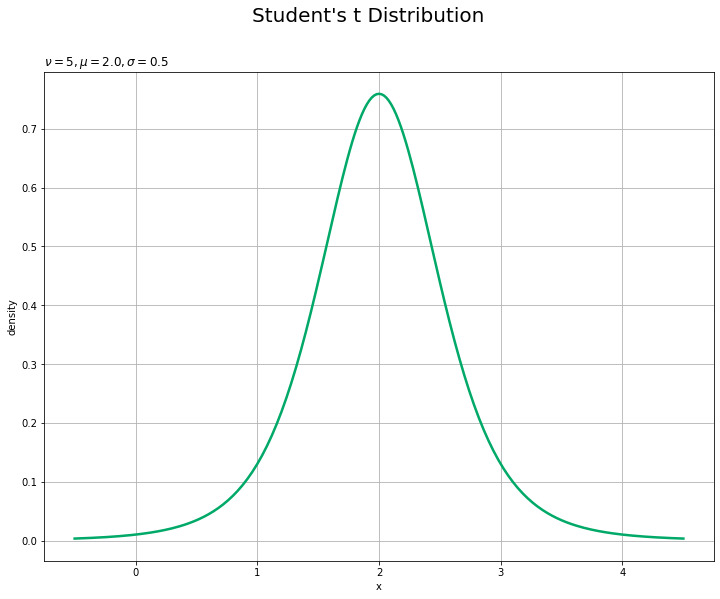

In [30]:
# スチューデントのt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, density, color='#00A968', linewidth=2.5) # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
plt.grid() # グリッド線
plt.show() # 描画

<br>

　この分布に統計量の情報を重ねて表示します。

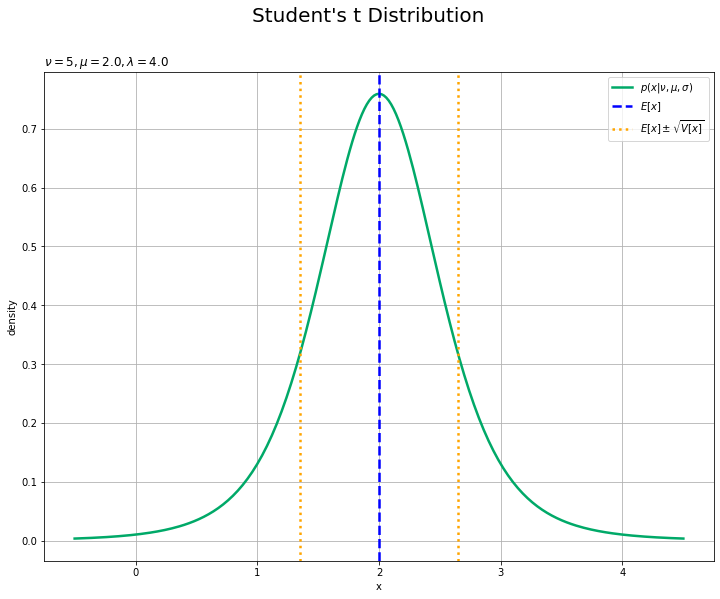

In [31]:
# 補助線用の統計量を計算
E_x = mu
s_x = np.sqrt(sigma**2 * nu / (nu - 2))

# 統計量を重ねたt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, density, color='#00A968', linewidth=2.5, label='$p(x | \\nu, \mu, \sigma)$') # 分布
plt.axvline(x=E_x, color='blue', linewidth=2.5, linestyle='--', label='$E[x]$') # 期待値
plt.axvline(x=E_x-s_x, color='orange', linewidth=2.5, linestyle=':', label='$E[x]\pm \sqrt{V[x]}$') # 期待値 - 標準偏差
plt.axvline(x=E_x+s_x, color='orange', linewidth=2.5, linestyle=':') # 期待値 + 標準偏差
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \lambda='+str(lmd)+'$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　$\nu > 1$のとき期待値と最頻値が一致します。$\nu \leq 0$のときは期待値を計算できません。  
<br>

　ガンマ分布のグラフを描画できました。以降は、ここまでの作図処理を用いて、パラメータの影響を確認していきます。  
<br>

## パラメータと分布の関係を並べて比較

　複数のパラメータのグラフを比較することで、パラメータの値と分布の形状の関係を確認します。  
<br>

　複数の$\nu$を指定し、$\mu, \sigma$を固定して、それぞれ分布を作図します。

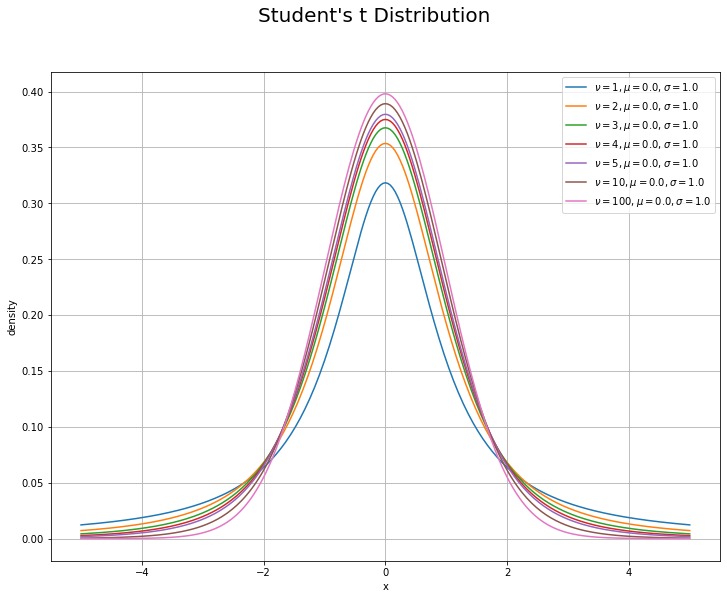

In [32]:
# 自由度として利用する値を指定
nu_vals = np.array([1, 2, 3, 4, 5, 10, 100])

# 固定するパラメータを指定
mu = 0.0
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu-sigma*5, stop=mu+sigma*5, num=251)

# スチューデントのt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
for nu in nu_vals:
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma) # 確率密度を計算
    plt.plot(x_vals, density, label='$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(sigma)+'$') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　$\nu$が小さいほど裾が厚くなり、$\nu$が大きいほどガウス分布に近付きます。  
<br>

　複数の$\mu$を指定し、$\nu, \sigma$を固定して、それぞれ分布を作図します。

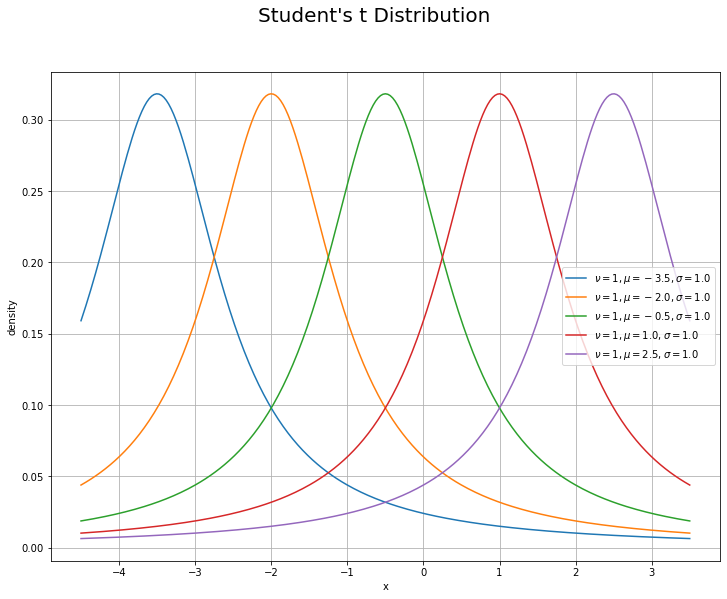

In [33]:
# 位置パラメータとして利用する値を指定
mu_vals = np.array([-3.5, -2.0, -0.5, 1.0, 2.5])

# 固定するパラメータを指定
nu = 1
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu_vals.min()-sigma, stop=mu_vals.max()+sigma, num=251)

# スチューデントのt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
for mu in mu_vals:
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma) # 確率密度を計算
    plt.plot(x_vals, density, label='$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(sigma)+'$') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　$\mu$が大きいほど、山が右に移動します。  
<br>

　複数の$\sigma$を指定し、$\nu, \mu$を固定して、それぞれ分布を作図します。

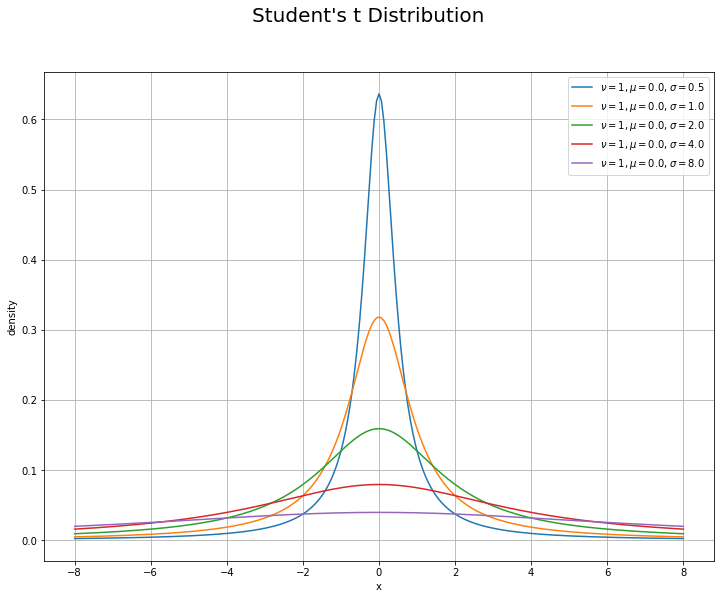

In [34]:
# スケールパラメータとして利用する値を指定
sigma_vals = np.array([0.5, 1.0, 2.0, 4.0, 8.0])

# 固定するパラメータを指定
nu = 1
mu = 0.0

# xの値を作成
x_vals = np.linspace(start=mu-sigma_vals.max(), stop=mu+sigma_vals.max(), num=251)

# スチューデントのt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
for sigma in sigma_vals:
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma) # 確率密度を計算
    plt.plot(x_vals, density, label='$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(sigma)+'$') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　$\sigma$が小さいほど、山が細く高くなります。  
<br>

　複数の$\lambda$を指定し、$\nu, \mu$を固定して、それぞれ分布を作図します。

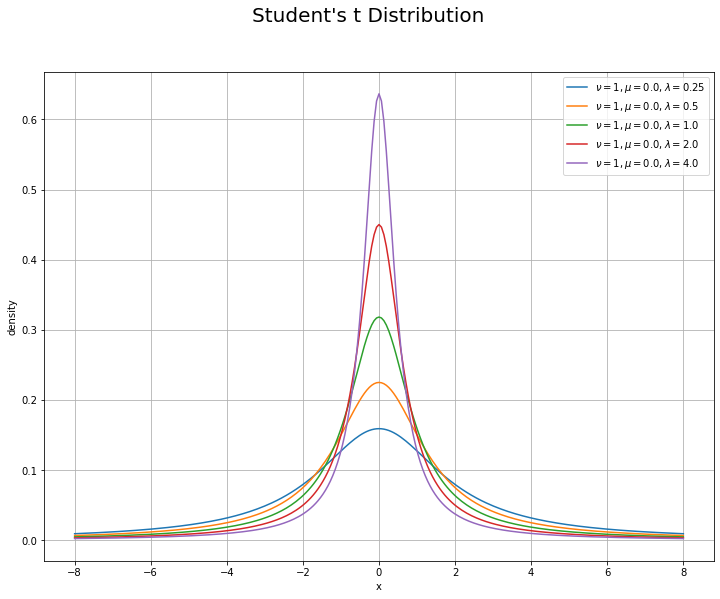

In [35]:
# 逆スケールパラメータとして利用する値を指定
lambda_vals = np.array([0.25, 0.5, 1.0, 2.0, 4.0])

# 固定するパラメータを指定
nu = 1
mu = 0.0

# xの値を作成
sigma = 1.0 / np.sqrt(lambda_vals.min())
x_vals = np.linspace(start=mu-sigma*4, stop=mu+sigma*4, num=251)

# スチューデントのt分布のグラフを作成
plt.figure(figsize=(12, 9)) # 図の設定
for lmd in lambda_vals:
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=1.0/np.sqrt(lmd)) # 確率密度を計算
    plt.plot(x_vals, density, label='$\\nu='+str(nu) + ', \mu='+str(mu) + ', \lambda='+str(lmd)+'$') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　$\lambda$が大きいほど、山が細く高くなります。  
<br>

## パラメータと分布の関係をアニメーションで可視化

　前節では、複数のパラメータのグラフを並べて比較しました。次は、パラメータの値を少しずつ変化させて、分布の形状の変化をアニメーションで確認します。  
<br>

　$\nu$の値を変化させ、$\mu, \sigma$を固定して、それぞれ分布を作図します。

30


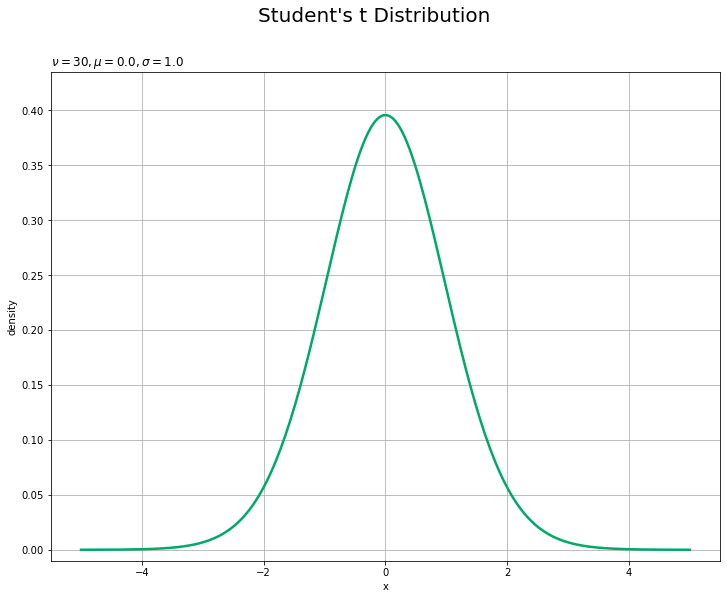

In [36]:
# 自由度として利用する値を指定
nu_vals = np.arange(1, 31)
print(len(nu_vals)) # フレーム数

# 固定するパラメータを指定
mu = 0.0
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu-sigma*5, stop=mu+sigma*5, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu_vals.max(), loc=mu, scale=sigma).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    nu = nu_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5) # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(np.round(nu, 2)) + ', \mu='+str(mu) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(nu_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_dens_nu.gif')

<br>

　$\mu$の値を変化させ、$\nu, \sigma$を固定して、それぞれ分布を作図します。

61


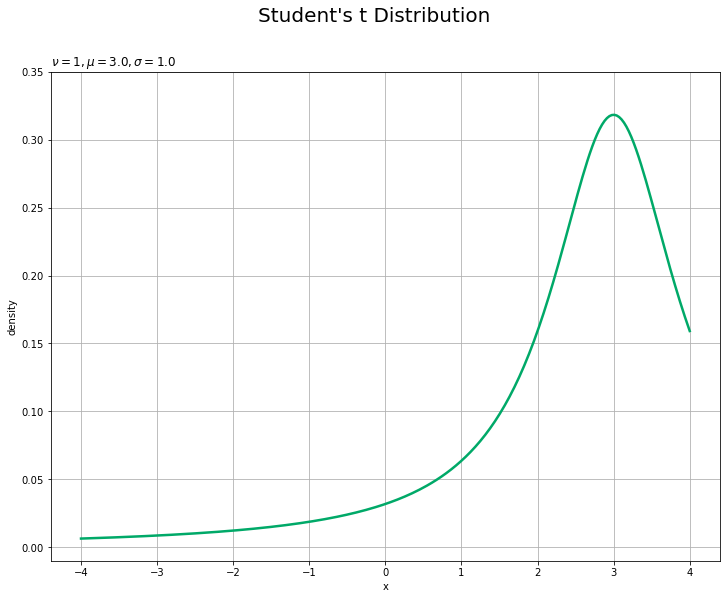

In [37]:
# 位置パラメータとして利用する値を指定
mu_vals = np.arange(-3.0, 3.1, 0.1)
print(len(mu_vals)) # フレーム数

# 固定するパラメータを指定
nu = 1
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu_vals.min()-sigma, stop=mu_vals.max()+sigma, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=np.median(mu_vals), scale=sigma).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    mu = mu_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5) # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(np.round(mu, 2)) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(mu_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_dens_mu.gif')

<br>

　$\sigma$の値を変化させ、$\nu, \mu$を固定して、それぞれ分布を作図します。

26


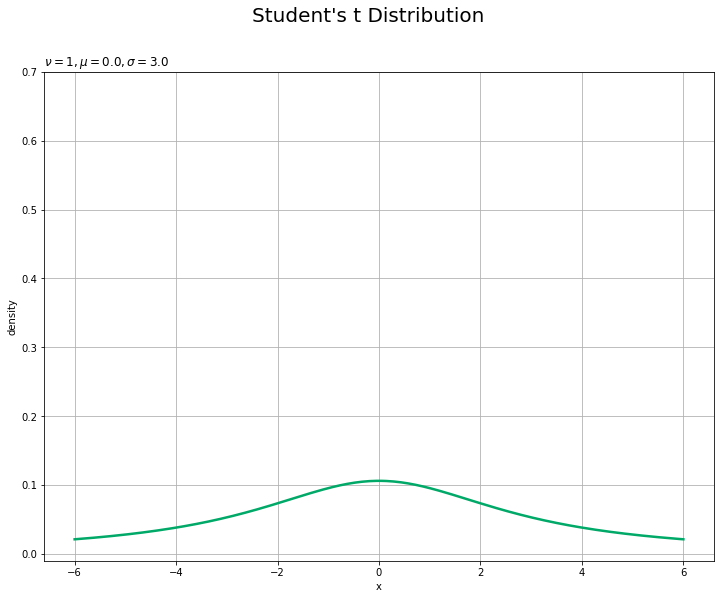

In [38]:
# スケールパラメータとして利用する値を指定
sigma_vals = np.arange(0.5, 3.1, 0.1)
print(len(sigma_vals)) # フレーム数

# 固定するパラメータを指定
nu = 1
mu = 0.0

# xの値を作成
x_vals = np.linspace(start=mu-sigma_vals.max()*2, stop=mu+sigma_vals.max()*2, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma_vals.min()).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    sigma = sigma_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5) # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(np.round(sigma, 2))+'$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(sigma_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_dens_sigma.gif')

<br>

　$\lambda$の値を変化させ、$\nu, \mu$を固定して、それぞれ分布を作図します。

30


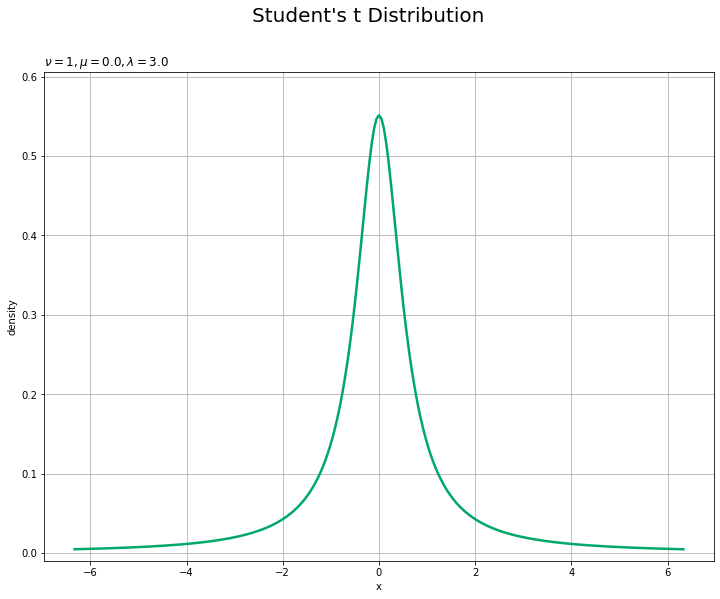

In [39]:
# 逆スケールパラメータとして利用する値を指定
lambda_vals = np.arange(0.1, 3.1, 0.1)
print(len(lambda_vals)) # フレーム数

# 固定するパラメータを指定
nu = 1
mu = 0.0

# xの値を作成
sigma = 1.0 / np.sqrt(lambda_vals.min())
x_vals = np.linspace(start=mu-sigma*2, stop=mu+sigma*2, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=mu, scale=1.0/np.sqrt(lambda_vals.max())).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    lmd = lambda_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=1.0/np.sqrt(lmd))
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5) # 折れ線グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \lambda='+str(np.round(lmd, 2))+'$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(lambda_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_dens_lambda.gif')

<br>

## パラメータと統計量の関係をアニメーションで可視化

　ここまでは、パラメータと分布の関係を確認しました。次は、パラメータと統計量の関係をアニメーションで確認します。  
<br>

　$\nu$の値を変化させ、$\mu, \sigma$を固定して、それぞれ統計量を計算し、分布を作図します。

30


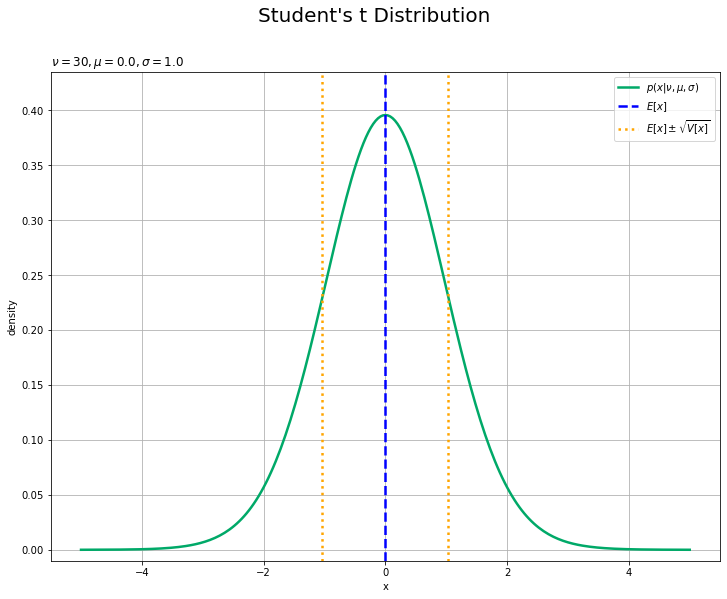

In [40]:
# 自由度として利用する値を指定
nu_vals = np.arange(1, 31)
print(len(nu_vals)) # フレーム数

# 固定するパラメータを指定
mu = 0.0
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu-sigma*5, stop=mu+sigma*5, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu_vals.max(), loc=mu, scale=sigma).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    nu = nu_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5, label='$p(x | \\nu, \mu, \sigma)$') # 分布
    if nu > 1:
        plt.axvline(x=mu, color='blue', linewidth=2.5, linestyle='--', label='$E[x]$') # 期待値
    if nu > 2:
        s_x = np.sqrt(sigma**2 * nu / (nu - 2)) # 標準偏差を計算
        plt.axvline(x=mu-s_x, color='orange', linewidth=2.5, linestyle=':', label='$E[x]\pm \sqrt{V[x]}$') # 期待値 - 標準偏差
        plt.axvline(x=mu+s_x, color='orange', linewidth=2.5, linestyle=':') # 期待値 + 標準偏差
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(np.round(mu, 2)) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
    plt.legend() # 凡例
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(nu_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_stat_nu.gif')

<br>

　$\mu$の値を変化させ、$\nu, \sigma$を固定して、それぞれ統計量を計算し、分布を作図します。

61


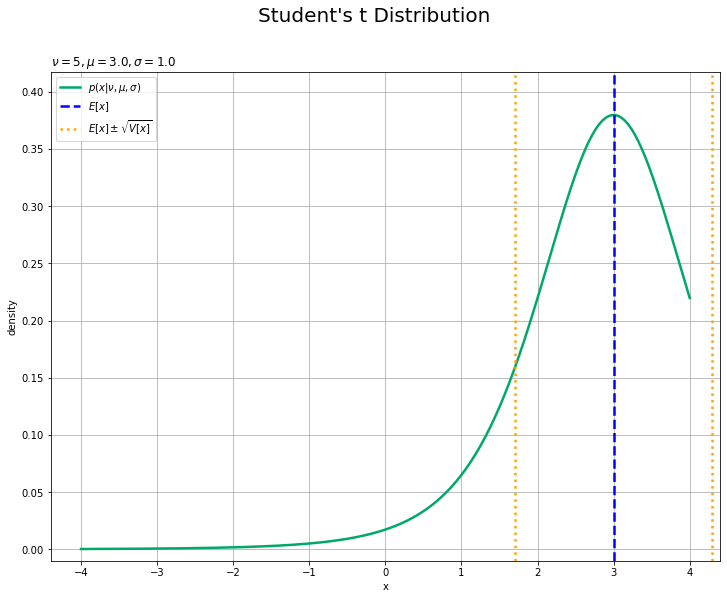

In [41]:
# 位置パラメータとして利用する値を指定
mu_vals = np.arange(-3.0, 3.1, 0.1)
print(len(mu_vals)) # フレーム数

# 固定するパラメータを指定
nu = 5
sigma = 1.0

# xの値を作成
x_vals = np.linspace(start=mu_vals.min()-sigma, stop=mu_vals.max()+sigma, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=np.median(mu_vals), scale=sigma).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    mu = mu_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5, label='$p(x | \\nu, \mu, \sigma)$') # 分布
    if nu > 1:
        plt.axvline(x=mu, color='blue', linewidth=2.5, linestyle='--', label='$E[x]$') # 期待値
    if nu > 2:
        s_x = np.sqrt(sigma**2 * nu / (nu - 2)) # 標準偏差を計算
        plt.axvline(x=mu-s_x, color='orange', linewidth=2.5, linestyle=':', label='$E[x]\pm \sqrt{V[x]}$') # 期待値 - 標準偏差
        plt.axvline(x=mu+s_x, color='orange', linewidth=2.5, linestyle=':') # 期待値 + 標準偏差
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(np.round(mu, 2)) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
    plt.legend() # 凡例
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(mu_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_stat_mu.gif')

<br>

　$\sigma$の値を変化させ、$\nu, \mu$を固定して、それぞれ統計量を計算し、分布を作図します。

26


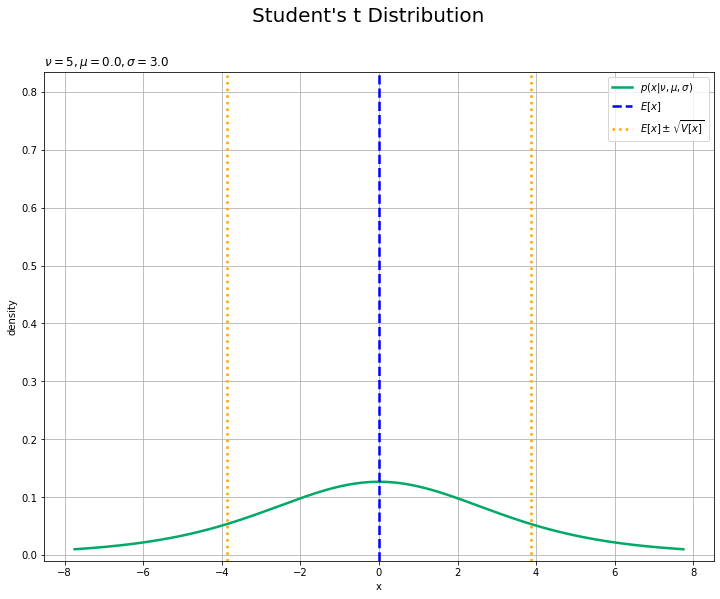

In [42]:
# スケールパラメータとして利用する値を指定
sigma_vals = np.arange(0.5, 3.1, 0.1)
print(len(sigma_vals)) # フレーム数

# 固定するパラメータを指定
nu = 5
mu = 0.0

# xの値を作成
s_x = np.sqrt(sigma_vals.max()**2 * nu / (nu - 2))
x_vals = np.linspace(start=mu-s_x*2, stop=mu+s_x*2, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma_vals.min()).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    sigma = sigma_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=sigma)
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5, label='$p(x | \\nu, \mu, \sigma)$') # 分布
    if nu > 1:
        plt.axvline(x=mu, color='blue', linewidth=2.5, linestyle='--', label='$E[x]$') # 期待値
    if nu > 2:
        s_x = np.sqrt(sigma**2 * nu / (nu - 2)) # 標準偏差を計算
        plt.axvline(x=mu-s_x, color='orange', linewidth=2.5, linestyle=':', label='$E[x]\pm \sqrt{V[x]}$') # 期待値 - 標準偏差
        plt.axvline(x=mu+s_x, color='orange', linewidth=2.5, linestyle=':') # 期待値 + 標準偏差
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(np.round(mu, 2)) + ', \sigma='+str(sigma)+'$', loc='left') # タイトル
    plt.legend() # 凡例
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \sigma='+str(np.round(sigma, 2))+'$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(sigma_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_stat_sigma.gif')

<br>

　$\lambda$の値を変化させ、$\nu, \mu$を固定して、それぞれ統計量を計算し、分布を作図します。

30


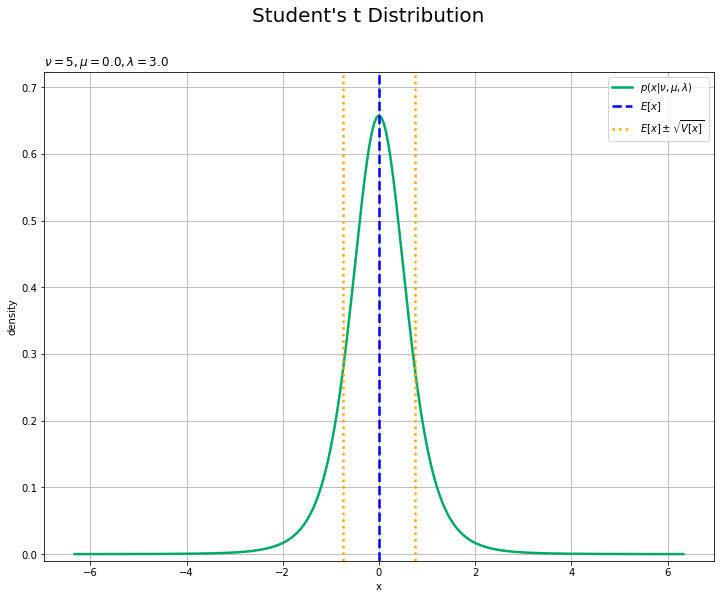

In [43]:
# 逆スケールパラメータとして利用する値を指定
lambda_vals = np.arange(0.1, 3.1, 0.1)
print(len(lambda_vals)) # フレーム数

# 固定するパラメータを指定
nu = 5
mu = 0.0

# xの値を作成
sigma = 1.0 / np.sqrt(lambda_vals.min())
x_vals = np.linspace(start=mu-sigma*2, stop=mu+sigma*2, num=251)

# 確率密度(y軸)の最大値を計算
dens_max = t.pdf(x=x_vals, df=nu, loc=mu, scale=1.0/np.sqrt(lambda_vals.max())).max()

# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Student's t Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の値を取得
    lmd = lambda_vals[i]
    
    # スチューデントのt分布を計算
    density = t.pdf(x=x_vals, df=nu, loc=mu, scale=1.0/np.sqrt(lmd))
    
    # スチューデントのt分布を作図
    plt.plot(x_vals, density, color='#00A968', linewidth=2.5, label='$p(x | \\nu, \mu, \lambda)$') # 分布
    if nu > 1:
        plt.axvline(x=mu, color='blue', linewidth=2.5, linestyle='--', label='$E[x]$') # 期待値
    if nu > 2:
        s_x = np.sqrt(nu / (nu - 2) / lmd) # 標準偏差を計算
        plt.axvline(x=mu-s_x, color='orange', linewidth=2.5, linestyle=':', label='$E[x]\pm \sqrt{V[x]}$') # 期待値 - 標準偏差
        plt.axvline(x=mu+s_x, color='orange', linewidth=2.5, linestyle=':') # 期待値 + 標準偏差
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$\\nu='+str(nu) + ', \mu='+str(mu) + ', \lambda='+str(np.round(lmd, 2))+'$', loc='left') # タイトル
    plt.legend() # 凡例
    plt.grid() # グリッド線
    plt.ylim(-0.01, dens_max*1.1) # y軸の表示範囲

# gif画像を作成
dens_anime = FuncAnimation(fig, func=update, frames=len(lambda_vals), interval=100)

# gif画像を保存
dens_anime.save('../../figure/Python/t_stat_lambda.gif')

<br>

　この記事では、1次元スチューデントのt分布のグラフを作成しました。  
<br>

# 参考書籍{-}

- 須山敦志『ベイズ推論による機械学習入門』(機械学習スタートアップシリーズ)杉山将監修,講談社,2017年.
- C.M.ビショップ著,元田 浩・他訳『パターン認識と機械学習 上』丸善出版,2012年.
